In [1]:
import pandas as pd
import numpy as np

# Introduction to Statistics in Finance

Many fields in finance rely on some sort of data analysis
- For example fundamental analysis of a business:
    - various numbers from the company itself (i.e. from the balance sheet)
    - indicators representing the overall market 
    
Results drive decisions, e.g. for an investement

There are many well established techniques and statistics for pricing financial products.

Some techniques more prominent since the dawn of powerful algorithms and artificial intelligence


## Returns

In order for an investment to be profitable, the money it yields must be higher than the inital investment made (plus transaction costs).

Assess so called return, usually discrete: relative change in investment value $S$.  

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} =\frac{S_t}{S_{t-1}} - 1 $$ 

Note here that one time step $t$ is of arbitrary length, e.g. daily or monthly


### Additivity

Returns my be based on different time spans $\rightarrow$ aggreagte somehow 

The property we are looking for is called addititvity: sum shorter-scale returns to get the larger-scale returns

Note that we can't just split monthly returns into daily returns, this requires making assumptions on the distribution 

Daily and weekly returns:  
To calculate weekly returns from daily returns, we mustn't use the daily return as is.  

time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
return $r_t$ |  --- | 0.10 |  0.10 |  -0.09 |  0.2  |  -0.20 |  0.07 | -0.06

If we simply added all returns, we'd find a weekly return of $r_{0,7} = 0.12$.  
However, using the formula from above, we find that
$$ r_{0,7} = \frac{S_7}{S_{0}} - 1 = \frac{105}{100} - 1  = 0.05 $$
and conclude that indeed daily returns cannot simply be added up in order to yield the weekly return.

We can calculate discrete returns simply by using a method of a Series object: `.pct_change()`.  
Note the `NaN` value for the first line.

In [2]:
df = pd.DataFrame({
    'S': [100, 110, 121, 110, 132, 105, 112, 105],
    },
index=list(range(8)))
df

S
0  100
1  110
2  121
3  110
4  132
5  105
6  112
7  105

In [3]:
df['discrete_returns'] = df['S'].pct_change()
df

S  discrete_returns
0  100               NaN
1  110          0.100000
2  121          0.100000
3  110         -0.090909
4  132          0.200000
5  105         -0.204545
6  112          0.066667
7  105         -0.062500

### Portfolios and cross-sectional additivity

A portfolio is a collection of investments, e.g. stocks.
Portfolios are allocated differently, i.e., by a degree of risk. We can describe a portfolio's value by the sum of the value of its constituents.

- We define the value of a **single position** $i$ by multiplying the number of stocks $N_i$ with the stock value $S_i$

$$    P_i = N_i \cdot S_i $$

- The **Total portfolio value** is the sum of all position values:

$$    P = \sum_i P_i = \sum_i N_i \cdot S_i$$

- The **weight** of company $i$ in the portfolio is then

$$  w_i = \frac{P_i}{P} = \frac{N_i \cdot S_i}{\sum_j N_j \cdot S_j}, \sum_i w_i = 1$$   


- With those weights, we can calculate the **portfolio return** (cross-sectional additivity) as weighted sum of the company returns $R_i$:

$$   R_p = \sum_i w_i \, R_i $$

- We talk about a **naive portfolio** of $J$ stocks when all weights are equal $w = w_1 = w_2 = ... = w_J$. In this case, the weighted sum becomes the **mean** of all stock returns $R_i$, as $w = \frac{1}{J}$ and the portfolio return is

$$R_p = \frac{1}{J} \sum_i^JR_i = mean(R_i)$$


### Portfolio return and cross-sectional additivity

We can show that property using the definitons from above
- **Price evolution for single stock** $i$:  

  $$ P_{t+1}^i = P_t^i \,(1 + r_{t+1}^i) $$


- Plugging this into the **Portfolio value**:  

$$    P_{t+1}^{PF} = \sum_i P_{t+1}^i = \sum_i P_t^i \,(1 + r_{t+1}^i)$$


- With the "regular" formula for discrete returns, the  **Portfolio return** is:  

$$    r_{t+1}^{PF}
    = \frac{P_{t+1}^{PF}}{P_t^{PF}} - 1
    = \frac{\sum_i P_t^i (1 + r_{t+1}^i)}{\sum_j P_t^j} - 1
    = \sum_i \frac{P_t^i}{\sum_j P_t^j}(1 + r_{t+1}^i) - 1
    = \sum_i w_i\,(1 + r_{t+1}^i) - 1
    = \sum_i w_i\,r_{t+1}^i $$


 
Let's have a look at the following data:
   
time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
company A $A_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
company B $B_t$  |  100 |  120 |  124  |  118   |  117  |  135  |  128  |   115  

For simplicity, we will assume to invest the same amount of money in both stocks. 
This gives initial portfolio weights $w_1=w_2=0.5$. For such a naive portfolio, we can then just apply the mean, i.e. the portfolio return on day $t$ is just the mean of all returns $r_{i,t}$ for all companies $i$.

Calculate the daily returns of the portfolio using pandas:

In [4]:
df = pd.DataFrame({
    'A': [100, 110, 121, 110, 132, 105, 112, 105],
    'B': [100, 120, 124, 118, 117, 135, 128, 115],
    },
index=list(range(8)))
df

A    B
0  100  100
1  110  120
2  121  124
3  110  118
4  132  117
5  105  135
6  112  128
7  105  115

When we want to calculate the returns for a naive portfolio, we simply calculate the mean over all returns. This give us the daily (naive) portfolio returns over time.

In [5]:
df_prices_and_returns = df.copy()
df_prices_and_returns['A_return'] = df_prices_and_returns.A.pct_change()
df_prices_and_returns['B_return'] = df_prices_and_returns.B.pct_change()
# mean applied to axis=1, means we calculate the row mean (axis=0 will calculate the column mean)
df_prices_and_returns.loc[1:,'naive_pf_return'] = df_prices_and_returns.loc[1:,['A_return', 'B_return']].mean(axis=1)
df_prices_and_returns

A    B  A_return  B_return  naive_pf_return
0  100  100       NaN       NaN              NaN
1  110  120  0.100000  0.200000         0.150000
2  121  124  0.100000  0.033333         0.066667
3  110  118 -0.090909 -0.048387        -0.069648
4  132  117  0.200000 -0.008475         0.095763
5  105  135 -0.204545  0.153846        -0.025350
6  112  128  0.066667 -0.051852         0.007407
7  105  115 -0.062500 -0.101562        -0.082031

We can apply `.pct_change()` to the whole dataframe, to create a new one with the same column names.

In [6]:
df_just_returns = df.copy()
df_just_returns = df_just_returns.pct_change()
df_just_returns

A         B
0       NaN       NaN
1  0.100000  0.200000
2  0.100000  0.033333
3 -0.090909 -0.048387
4  0.200000 -0.008475
5 -0.204545  0.153846
6  0.066667 -0.051852
7 -0.062500 -0.101562

### Characteristics of returns 

Usually, returns exhibit the following:
- expected returns are close to zero (the shorter the time span, the smaller the expected return)
- weakly stationary (i.e. constant expected value and variance over time) **but** usually volatility clustering
- skewed distribution

From these items alone, we can start an analysis of stock returns by looking at some (standardized) moments of the empirical data:
- the average return as an estimate of the expected return
- the empirical variance or standard deviation/volatility 

Use pandas, by calling the appropriate methods.

We will have a look at real-world data, downloading close prices using the yfinance package and calculating the returns. 

In [7]:
import yfinance as yf

msft = yf.Ticker('MSFT')
msft = msft.history(
    start='2020-01-01',
    period=None
)

In [8]:
msft = msft[['Close']].copy()
msft['daily_disc_return'] = msft['Close'].pct_change()
msft.dropna(inplace=True)

In [9]:
avg_return = msft.daily_disc_return.mean()
vola = msft.daily_disc_return.std()

print(f'average return {np.round(avg_return,4)}')
print(f'volatility {np.round(vola, 4)}')

average return 0.0011
volatility 0.0191


As we discussed in earlier chapter, it is always recommended to take a look at some charts.  
We can plot returns over time as well as look at the distribution.

<AxesSubplot:xlabel='Date'>

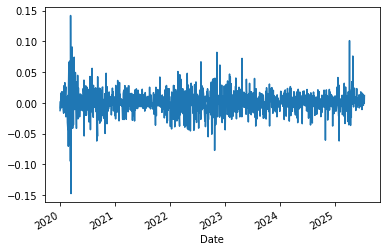

In [10]:
msft.daily_disc_return.plot()

<AxesSubplot:>

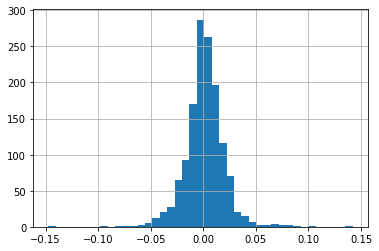

In [11]:
msft.daily_disc_return.hist(bins=41)

# The CAPM factor-model and excess returns 


The Captial Asset Pricing Model in its most simple form (Sharpe, Lintner) quantifies an assets risk with regard to non-diversifiable market risk.

Risk can usually be attributed to two sources: idiosyncratic and systematic (market) risk

Idiosyncratic risk can be eliminated by constructing a diversified portfolio, systematic risk remains

Use ordinary least squares (OLS) model to estimate:

$$ r_{i,t} - r_{f,t} = \alpha + \beta \cdot (r_{M,t} - r_{f,t}) + \epsilon_{i,t}$$

assume a risk-free rate of $r_{f,t}=0$:

$$ r_{i,t} = \alpha_i + \beta_i \cdot r_{M,t} + \epsilon_{i,t}$$

## about the coefficients
In general $\alpha_i$ should not be statistically significant for the model to be valid

Assuming it in fact isn't, $\beta_i$ tells us about the sensitivity of the asset with regard to market risk:
- for $\beta=1$ an asset's expected return is assumed to match the expected market return
- for $\beta >1$ an asset is more volatile than the market and thus considered more risky than the market
- for $\beta <1$ an asset is less volatile than the market and considered less risky than the market

Note: 
- we can never know the market return which we use as a benchmark $\rightarrow$ use a proxy like the S&P 500

In [12]:
import yfinance as yf
import pandas as pd

msft = yf.Ticker('MSFT').history(start="2020-01-01").reset_index()
sp_500 = yf.Ticker('^GSPC').history(start="2020-01-01").reset_index()
rf = 0.01

In [13]:
sp_500.head(1)

Date         Open         High          Low  \
0 2020-01-02 00:00:00-05:00  3244.669922  3258.139893  3235.530029   

         Close      Volume  Dividends  Stock Splits  
0  3257.850098  3459930000        0.0           0.0

In [14]:
msft.head(1)

Date        Open        High         Low       Close  \
0 2020-01-02 00:00:00-05:00  151.289138  153.147139  150.860371  153.042328   

     Volume  Dividends  Stock Splits  
0  22622100        0.0           0.0

In [15]:
# excess returns by subtracting r_f
# if r_f is not constant, but changing over time, we would merge the r_f column to the discrete returns  
# to match the days, then subtract it from the returns to get excess returns

msft['daily_excess_return'] = msft.Close.pct_change() - rf
sp_500['daily_excess_return'] = sp_500.Close.pct_change() - rf

In [16]:
sp_500.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Dividends              0
Stock Splits           0
daily_excess_return    1
dtype: int64

In [17]:
msft.dropna(inplace=True)
sp_500.dropna(inplace=True)

In [18]:
sp_500.head(1)

Date         Open         High          Low  \
1 2020-01-03 00:00:00-05:00  3226.360107  3246.149902  3222.340088   

         Close      Volume  Dividends  Stock Splits  daily_excess_return  
1  3234.850098  3484700000        0.0           0.0             -0.01706

In [19]:
sp_500.columns = [el+'_sp' for el in sp_500.columns] 

$$ r_{i,t} - r_{f,t} = \alpha + \beta \cdot (r_{M,t} - r_{f,t}) + \epsilon_{i,t}$$

In [20]:
sp_500.head(1)

Date_sp      Open_sp      High_sp       Low_sp  \
1 2020-01-03 00:00:00-05:00  3226.360107  3246.149902  3222.340088   

      Close_sp   Volume_sp  Dividends_sp  Stock Splits_sp  \
1  3234.850098  3484700000           0.0              0.0   

   daily_excess_return_sp  
1                -0.01706

In [21]:
msft.head(1)

Date        Open        High        Low       Close  \
1 2020-01-03 00:00:00-05:00  150.850823  152.403913  150.60308  151.136658   

     Volume  Dividends  Stock Splits  daily_excess_return  
1  21116200        0.0           0.0            -0.022452

In [22]:
msft_reg = pd.merge(msft[['Date', 'daily_excess_return']], 
                    sp_500[['Date_sp', 'daily_excess_return_sp']],
                    left_on='Date', right_on='Date_sp') #on=['Date']
msft_reg.drop(columns=['Date_sp'], inplace=True)
# msft_reg = msft_reg[['Date', 'daily_excess_return', 'daily_excess_return_sp']]
msft_reg.head(2)

Date  daily_excess_return  daily_excess_return_sp
0 2020-01-03 00:00:00-05:00            -0.022452               -0.017060
1 2020-01-06 00:00:00-05:00            -0.007415               -0.006467

In [23]:
import statsmodels.api as sm

X = sm.add_constant(msft_reg['daily_excess_return_sp'])
#X = msft_reg['daily_excess_return_sp']
y = msft_reg['daily_excess_return']

lr_msft = sm.OLS(y, X).fit()
print(lr_msft.summary())

                             OLS Regression Results                            
Dep. Variable:     daily_excess_return   R-squared:                       0.665
Model:                             OLS   Adj. R-squared:                  0.665
Method:                  Least Squares   F-statistic:                     2756.
Date:                 Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                         13:30:56   Log-Likelihood:                 4293.3
No. Observations:                 1391   AIC:                            -8583.
Df Residuals:                     1389   BIC:                            -8572.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [24]:
lr_msft.params

const                     0.001870
daily_excess_return_sp    1.146926
dtype: float64

$\rightarrow$ Microsoft is somewhat sensitive towards market risk, since $\beta > 1$

In [25]:
lr_msft.pvalues

const                     2.562395e-07
daily_excess_return_sp    0.000000e+00
dtype: float64

$\rightarrow$ In accordance with the CAPM, $\alpha$ is not significant, i.e. its p-value is larger than 5%